# Packages


1. Import required packages.

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.cluster import DBSCAN, KMeans

# visualisation
from plotnine import *

# Data Preparation

2. Choose the same data as in the Lab-lecture and prepare the dataframe "df"

In [2]:
num_points = 4000
x = random.sample(population=set(np.linspace(start=-10, stop=10, num=num_points)), k=num_points)
y = random.sample(population=set(np.linspace(start=-10, stop=10, num=num_points)), k=num_points)
z = [(x**2 + y**2) for x, y in zip(x, y)]

df = pd.DataFrame(list(zip(x, y, z)), columns=['x', 'y', 'z'])
df['class'] = [1 if ((i<10) | (80 < i< 100))  else 0 for i in df['z']]

We can clearly see two different patterns - an inner ring and an outer ring. The task is to find an algorithm that can distinguish both classes.

In [3]:
df = df[df['class']==1]  # filter for class 1
df = df.drop(['z', 'class'], axis=1)  # delete not required columns

3. Check visually that the data was created successfully

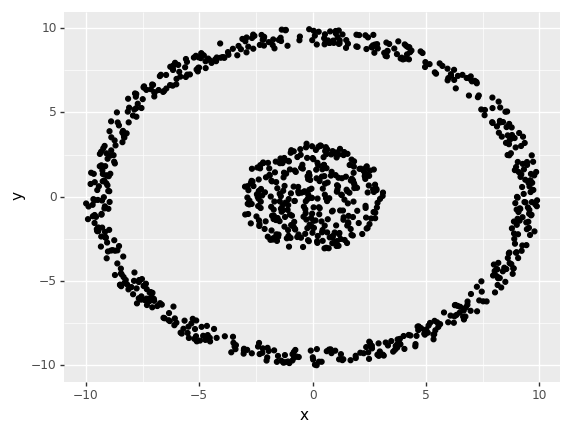

<ggplot: (101611392197)>

In [4]:
(ggplot(data=df) +
  aes(x='x', y='y') +
  geom_point()
)

# Modeling

4. Perform the clustering based on Kmeans algorithm.

In [9]:
clustering = KMeans(n_clusters=2).fit(df)

In [7]:
df['labels'] = clustering.labels_

5. Create a graph that shows the result.

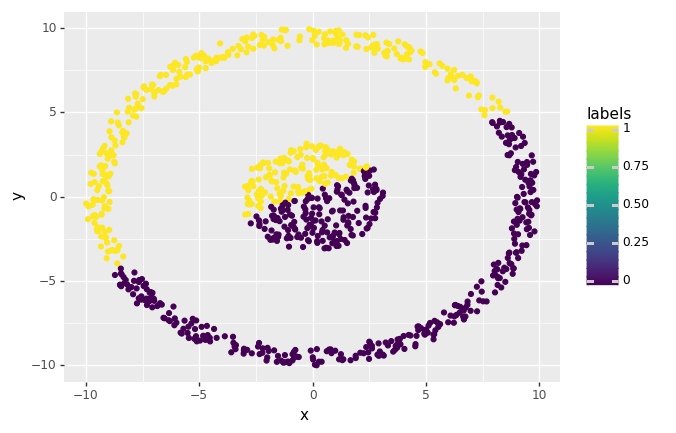

<ggplot: (-9223371935242509308)>

In [8]:
(ggplot(data=df) +
  aes(x='x', y='y', color='labels') +
  geom_point()
)

The two different classes were distinguished perfectly.